In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize                                                        # Necessary Functions
def sigmoid(inputs):
  output = 1 / (1 + np.exp(-inputs))
  return output

def sigmoid1(inputs):                                                           # first derivative of sigmoid
  temp1 =  sigmoid(inputs)
  temp2 = temp1*(1-temp1)
  return temp2

def sigmoid2(inputs):                                                           # Second derivative of sigmoid
  temp1 =  sigmoid(inputs)
  temp2 = temp1*(1-temp1)*(1-2*temp1)
  return temp2

def sigmoid3(inputs):                                                           # Third derivative of sigmoid
  temp1 =  sigmoid(inputs)
  temp2 = temp1*(1-temp1)*(1-6*temp1+6*(temp1**2))
  return temp2

def func6(inputs):
  X = inputs.T
  x = X[:,0]
  y = X[:,1]

  temp1 =  2 - (y**2)*(np.pi**2)
  temp2 = np.sin(np.pi * x)
  temp3 = temp1*temp2
  temp3 = temp3.reshape(len(x),1)
  # print(len(x))
  return temp3




                                                                                # Intial Value Intialisation
def get_grid(grid_len,a=0,b=1):
  nx, ny = (grid_len, grid_len)
  x = np.linspace(a, b, nx)
  y = np.linspace(a, b, ny)
  grid = [(i,j) for i in x for j in y]
  return [np.array(grid).T,[x,y]]








def layer1NN(p,inputs):                                                         # Neural Network with 1 hidden unit
  # inputs.resize((len(inputs),1))
  weights = p[0:2*(len(p)//4)].reshape(2,len(p)//4)
  biases = p[2*(len(p)//4):3*(len(p)//4)].reshape(1,len(p)//4)
  nweights = p[3*(len(p)//4):4*(len(p)//4)].reshape(1,len(p)//4)


  lin_out = weights.T @ inputs + biases.T
  # lin_out = weights @ inputs + biases                                         # output shape(n_neurons, input_size )
  nor_out = sigmoid(lin_out)
  net_out = nweights @ nor_out                                                  # output shape(1, input_size )
  # net_out = net_out.T
  # print(nweights.shape,nor_out.shape)
  return lin_out, net_out





def sigmoid_for_k(input,k):
  if k ==0:
    return sigmoid(input)
  elif k == 1:
    return sigmoid1(input)
  elif k ==2:
    return sigmoid2(input)
  elif k == 3:
    return sigmoid3(input)



def der_NN_xj_k(inputs, weights, nweights, biases,X, j,k=0):                    # This calculates D^k_N/D^k_x when j =0, and D^k_N/D^k_y when j=1
  # X = (x_1,x_2)
  # j = derivative w.r.t x_1 or x_2
  # k = kth derivative w.r.t x_j



  temp1 = weights[j]**k
  temp2 = nweights * temp1                                                      # (1,n_neurons)
  lin_out = weights.T @ inputs + biases.T
  # lin_out = weights @ inputs + biases
  temp3 = sigmoid_for_k(lin_out,k)
  temp4 = temp2 @ temp3
  # print(temp4.shape)
  return temp4.T                                                               # return (n,1) shape array

def der_NN_xy_k(inputs, weights, nweights, biases,X, j,k):
  # temp1 =1
  # for i in range(len(j)):
  #   temp1 = temp1*(weights[j[i]]**k[i])

  temp1 = (weights[0]**k[0])*(weights[1]**k[1])

  temp2 = nweights * temp1
  lin_out = weights.T @ inputs + biases.T
  # lin_out = weights @ inputs + biases
  temp3 = sigmoid_for_k(lin_out,sum(k))
  # print(temp2.shape, temp3.shape)
  temp4 = temp2 @ temp3
  return temp4.T

def der_NN_xj_k_for_v(inputs, weights, nweights, biases,X, j,k=0):
  # X = (x_1,x_2)
  # j = derivative w.r.t x_1 or x_2
  # k = kth derivative w.r.t x_j
  lin_out = weights.T @ inputs + biases.T
  temp1 = ((weights[j]**k) * (sigmoid_for_k(lin_out,k).T) )
  return temp1                                                                  # return (n,n_neurons) shape array

def der_NN_xj_k_for_u(inputs, weights, nweights, biases,X, j,k=0):
  # X = (x_1,x_2)
  # j = derivative w.r.t x_1 or x_2
  # k = kth derivative w.r.t x_j
  lin_out = weights.T @ inputs + biases.T
  # lin_out = weights @ inputs + biases
  temp1 = weights[j]**k
  temp2 = nweights * temp1
  # temp2.reshape(weights[j].shape)
  temp3 = (sigmoid_for_k(lin_out,k+1).T * temp2)
  return temp3                                                                  # return (n,n_neurons) shape array

def der_NN_xj_k_for_w(inputs, weights, nweights, biases,X, j,k=0):
  # X = (x_1,x_2)
  # j = derivative w.r.t x_1 or x_2
  # k = kth derivative w.r.t x_j
  X = inputs.T
  x = X[:,0]
  # x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)

  lin_out = weights.T @ inputs + biases.T


  temp1 = ((nweights*(weights[j]**k)) * (sigmoid_for_k(lin_out,k+1).T) )
  temp2 = x
  temp3 = temp2 * (temp1.T)
  temp3 = temp3.T

  if k >0:
    temp4 = k*((nweights*(weights[j]**(k-1))) * (sigmoid_for_k(lin_out,k).T) )
    return temp3 + temp4

  return temp3                                                                   # return (n, n_neurons) shape array



def D2_B_wrt_x1(inputs):
  X = inputs.T
  x = X[:,0]
  y = X[:,1]                                                                    #  D^2 B/Dx^2
  temp1 = -2*(np.pi**2)*y
  temp2 = np.sin(np.pi*x)
  temp3 = temp1 * temp2
  temp3 = temp3.reshape(len(x),1)
  return temp3

def D2_B_wrt_x2(inputs):
  # X = inputs.T
  # x = X[:,0]
  # y = X[:,1]                                                                  # D^2 B/Dy^2
  # temp1 = 6*(1- x)*y
  # temp2 = (6*np.exp(-1))*(x)*y
  # temp3 = temp1 + temp2
  # temp3 = temp3.reshape(len(x),1)
  return 0

def D2_F_wrt_x1(inputs, weights, nweights, biases):                           # D^2 F/Dx^2
  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)


  x1 = np.zeros(X.shape)
  x1[:,0] = x.T
  x1[:,1] = np.ones((1,len(y)))

  inputs1 = x1.T


  # Phi = B(x,y) + F(x,y,N)
  N_0 = der_NN_xj_k(inputs, weights, nweights, biases,X,j=0,k=0)
  N_0_y1 = der_NN_xj_k(inputs1, weights, nweights, biases,X,j=0,k=0)
  N_1_y1 = der_NN_xj_k(inputs1, weights, nweights, biases,X,j=1,k=1)




  N_1 = der_NN_xj_k(inputs, weights, nweights, biases,X,j=0,k=1)
  N_1_y1 = der_NN_xj_k(inputs1, weights, nweights, biases,X,j=0,k=1)
  N_2_y1 = der_NN_xy_k(inputs1, weights, nweights, biases,X,j=[0,1],k=[1,1])



  N_2 = der_NN_xj_k(inputs, weights, nweights, biases,X,j=0,k=2)
  N_2_y1 = der_NN_xj_k(inputs1, weights, nweights, biases,X,j=0,k=2)
  N_3_y1 = der_NN_xy_k(inputs1, weights, nweights, biases,X,j=[0,1],k=[2,1])

  temp1 = -2* (N_0  - N_0_y1  - N_1_y1)
  temp2 = (2-4*x)*(N_1 - N_1_y1  - N_2_y1)
  temp3 = (x- x**2)*(N_2 - N_2_y1  - N_3_y1)
  temp4 = (y)*(temp1 + temp2 + temp3)                                       # return (n,n_neurons) shape array

  # print(temp1.shape,temp2.shape,temp3.shape,temp4.shape)
  return temp4

def D2_F_wrt_x2(inputs, weights, nweights, biases):                           # D^2 F/Dy^2

  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)

  x1 = np.zeros(X.shape)
  x1[:,0] = x.T
  x1[:,1] = np.ones((1,len(y)))

  inputs1 = x1.T

  # Phi = B(x,y) + F(x,y,N)
  N_0 = der_NN_xj_k(inputs, weights, nweights, biases,X,j=1,k=0)
  N_1 = der_NN_xj_k(inputs, weights, nweights, biases,X,j=1,k=1)
  N_2 = der_NN_xj_k(inputs, weights, nweights, biases,X,j=1,k=2)
  N_0_y1 = der_NN_xj_k(inputs1, weights, nweights, biases,X,j=0,k=0)
  N_1_y1 = der_NN_xj_k(inputs1, weights, nweights, biases,X,j=1,k=1)

  temp1 = 2*N_1
  temp2 = y*N_2
  # temp3 = (y- y**2)*N_2
  temp4 = (x-x**2)*(temp1 + temp2)
  return temp4                                                                  # return (n,n_neurons) shape array


def error(d2_F_wrt_x1 ,d2_F_wrt_x2 ,d2_B_wrt_x1 ,d2_B_wrt_x2 ,F_XY):
  temp1 = (d2_F_wrt_x1 + d2_F_wrt_x2 + d2_B_wrt_x1 + d2_B_wrt_x2)
  temp2 = F_XY
  # print(temp1.shape)
  return (temp1 -temp2)

In [2]:
def error6(p,inputs):
  weights = p[0:2*(len(p)//4)].reshape(2,len(p)//4)
  biases = p[2*(len(p)//4):3*(len(p)//4)].reshape(1,len(p)//4)
  nweights = p[3*(len(p)//4):4*(len(p)//4)].reshape(1,len(p)//4)           # This calculates Error

  F_XY        = func6(inputs)
  d2_F_wrt_x1 = D2_F_wrt_x1(inputs, weights, nweights, biases)
  d2_F_wrt_x2 = D2_F_wrt_x2(inputs, weights, nweights, biases)
  d2_B_wrt_x1 = D2_B_wrt_x1(inputs)
  d2_B_wrt_x2 = D2_B_wrt_x2(inputs)


  temp1 = (d2_F_wrt_x1 + d2_F_wrt_x2 + d2_B_wrt_x1)
  temp2 = F_XY
  # print(temp1.shape,d2_F_wrt_x1.shape,d2_A_wrt_x1.shape)
  return (temp1 -temp2).T@ (temp1 -temp2)

In [33]:
def get_grid(grid_len,a=0,b=1):                                                 # Creating a grid of training point and converting it into shape (2,100)
  nx, ny = (grid_len, grid_len)
  x = np.linspace(a, b, nx)
  y = np.linspace(a, b, ny)
  grid = [(i,j) for i in x for j in y]
  return [np.array(grid).T,[x,y]]
n_train = 10
inputs,X = get_grid(n_train)
n_inputs = 2
n_neurons =10

p6 = np.random.randn(1,4*n_neurons)
p6 = p6[0]
# p =p6

In [26]:
p6 = np.array([ 5.04094917e-01, -1.02481650e+01, -1.53376849e+00, -4.61306669e+00,
        3.02033961e+00, -2.91738307e+00,  1.60911605e+00,  5.15168106e+01,
        2.39296990e+00,  2.34090646e+00, -3.77562763e-01,  8.30372297e+00,
        4.29378133e-01, -1.75491763e+00,  1.58486250e+00, -8.81285787e-01,
       -2.96548623e-01, -3.05614938e-03,  5.04462154e-01,  4.46226419e-01,
       -1.94202589e+00, -1.78963348e+00, -2.63045248e+00, -1.33311157e+00,
        1.20557342e+00,  9.80300649e-01, -6.31738906e-01, -1.85294757e-01,
       -1.60966503e+00, -2.77833597e+00,  2.14287781e+01,  1.47688719e-04,
       -9.02952755e+00,  2.87578056e+00,  5.69371789e+00, -2.83927521e+00,
       -2.75996968e+01, -6.94076923e-05,  1.28524998e+01,  9.84404030e+00])

In [27]:
err = error6(p6,inputs)
err

array([[2.91082543e-05]])

In [28]:
res6 = minimize(error6,p6, method='nelder-mead',args=(inputs), options={'xatol': 1e-8, 'disp': True})

<ipython-input-28-f02f73023aa8>:1: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  res6 = minimize(error6,p6, method='nelder-mead',args=(inputs), options={'xatol': 1e-8, 'disp': True})


In [42]:
# for i in range(10):
res6 = minimize(error6,res6.x, method='nelder-mead',args=(inputs), options={'xatol': 1e-14, 'disp': True})


<ipython-input-42-c091fb6c1e96>:2: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  res6 = minimize(error6,res6.x, method='nelder-mead',args=(inputs), options={'xatol': 1e-14, 'disp': True})


In [45]:
res6 = minimize(error6,res6.x,args=(inputs))

In [46]:
error6(res6.x,inputs)

array([[1.78520641e-05]])

In [47]:
def trail_sol(p,inputs, b_xy):
  weights = p[0:2*(len(p)//4)].reshape(2,len(p)//4)
  biases = p[2*(len(p)//4):3*(len(p)//4)].reshape(1,len(p)//4)
  nweights = p[3*(len(p)//4):4*(len(p)//4)].reshape(1,len(p)//4)
  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)


  x1 = np.zeros(X.shape)
  x1[:,0] = x.T
  x1[:,1] = np.ones((1,len(y)))

  inputs1 = x1.T

  _,N = layer1NN(p,inputs)
  _,N1 = layer1NN(p,inputs1)
  N2 = der_NN_xj_k(inputs1, weights, nweights, biases,X, j=1,k=1)
  # print(len(x))
  temp1 = b_xy
  temp2 = (x-x**2)*y*(N.T - N1.T - N2)
  # print(N.shape, N1.shape, N2.shape)
  return temp1 + temp2


def B_XY(inputs):
  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)

  temp1 = (2*y)*(np.sin(np.pi*x) + x*np.sin(np.pi))

  return temp1


def analytic_sol6(inputs):
  X = inputs.T
  x = X[:,0]
  x = x.reshape(len(x),1)
  y = X[:,1]
  y = y.reshape(len(y),1)

  temp1 = np.sin(np.pi *x)
  temp2 = y**2

  return temp1 * temp2




In [48]:
y_true = analytic_sol6(inputs)
#Test Data

n_test = 1000
inputs,X = get_grid(n_test)

_, netout = layer1NN(res6.x,inputs)
b_xy = B_XY(inputs)
y_predict = trail_sol(res6.x,inputs, b_xy)
y_true = analytic_sol6(inputs)
X = inputs.T
x = X[:,0]
x = x.reshape(len(x),1)
y = X[:,1]
y = y.reshape(len(y),1)

# y_predict = y_predict.reshape(100,100)
# y_predict

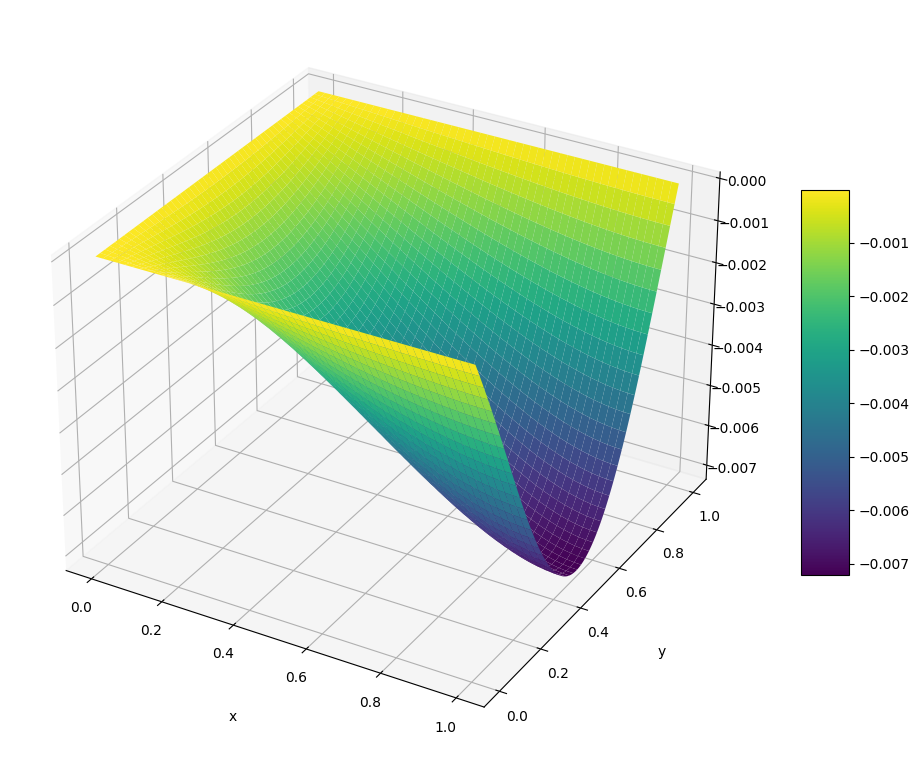

In [49]:

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.linspace(0, 1, n_test)
y = np.linspace(0, 1, n_test)

X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, (y_true-y_predict).reshape(n_test,n_test), cmap = 'viridis')


# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()






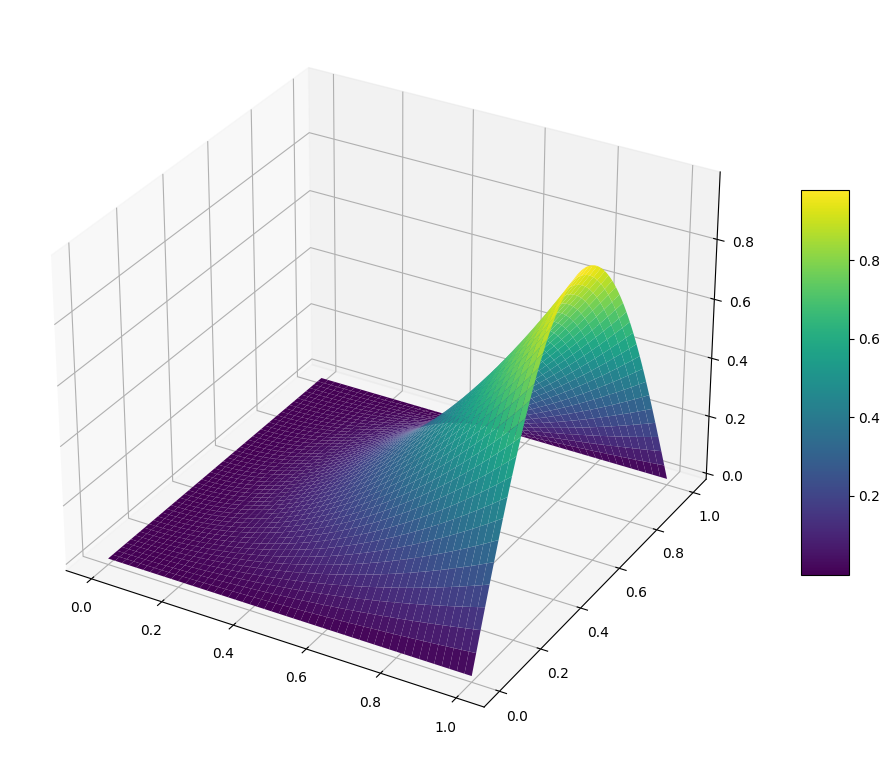

In [20]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.linspace(0, 1, n_test)
y = np.linspace(0, 1, n_test)

X, Y = np.meshgrid(x, y)
surf1 = ax.plot_surface(X, Y, (y_true).reshape(n_test,n_test), cmap = 'viridis')

fig.colorbar(surf1, shrink=0.5, aspect=8)

plt.show()

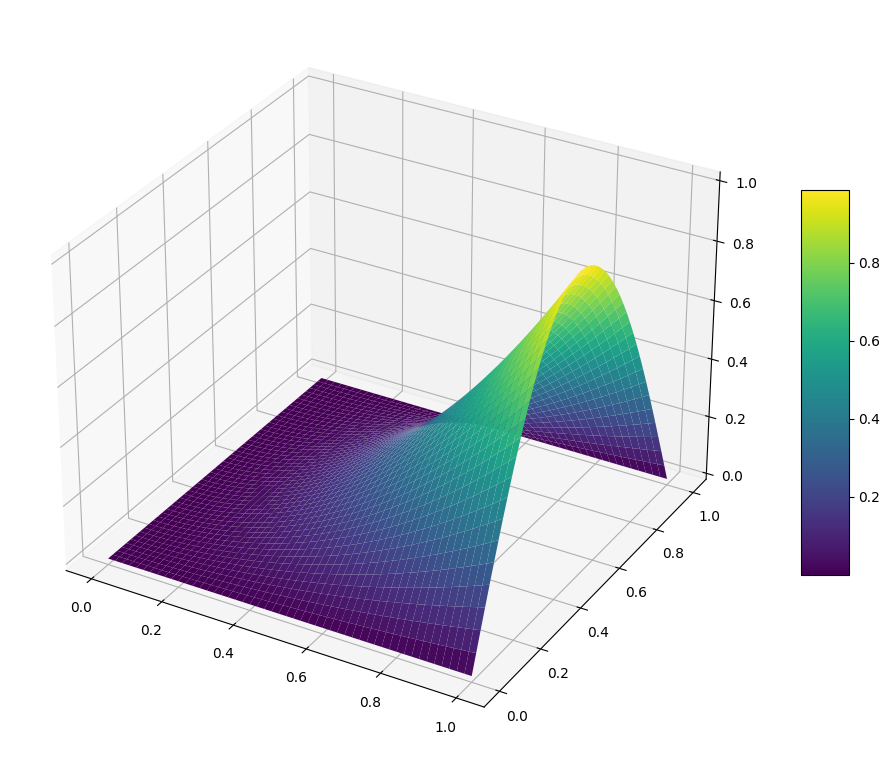

In [21]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.linspace(0, 1, n_test)
y = np.linspace(0, 1, n_test)

X, Y = np.meshgrid(x, y)
surf1 = ax.plot_surface(X, Y, (y_predict).reshape(n_test,n_test), cmap = 'viridis')

fig.colorbar(surf1, shrink=0.5, aspect=8)

plt.show()

In [ ]:
def sigmoid3_true(inputs):
  temp1 =  sigmoid(inputs)
  temp2 = temp1*(1-temp1)*(1-(6*temp1)+6*(temp1**2))
  return temp2

def sigmoid3_check(inputs):
  temp1 =  sigmoid(inputs)
  temp2 =  sigmoid1(inputs)
  temp3 = temp2*(1-temp1)*(1-2*temp1) - temp1*temp2*(1-2*temp1) - 2*temp2*temp1*(1-temp1)
  return temp3

In [ ]:
np.max(sigmoid3_true(inputs) - sigmoid3_check(inputs))

In [ ]:
import scipy
scipy.linalg.norm((y_true-y_predict))